In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

import matplotlib.ticker as ticker


# Fibonaccijeva števila

## Analiza paralelnega izračuna Fibonaccijevih števil v odvisnosti od števila domen

In [2]:
df_fib_domains = pd.read_csv('fib_par_domains.csv')

/var/folders/9s/v0gzy6497956yzhn8x7gf8mh0000gn/T/ipykernel_61545/2813857426.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')


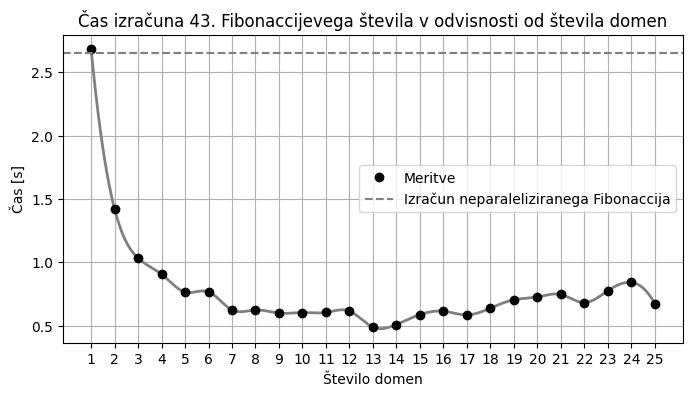

In [3]:
izracun_neparaleliziranega_fibonaccija = 2.65

# Create a new figure
plt.figure(figsize=(8, 4))

# Making the line plot smoother using scipy
xnew = np.linspace(df_fib_domains['num_domains'].min(), df_fib_domains['num_domains'].max(), 500) 
spl = make_interp_spline(df_fib_domains['num_domains'], df_fib_domains['time'], k=3)
power_smooth = spl(xnew)

# Plot the smooth line
plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')

# Plot the data points
plt.plot(df_fib_domains['num_domains'], df_fib_domains['time'], 'ko', label='Meritve')

# Add a straight horizontal line at y=2.9
plt.axhline(y=izracun_neparaleliziranega_fibonaccija, color='grey', linestyle='--', label='Izračun neparaleliziranega Fibonaccija')

# Add title and labels
plt.title('Čas izračuna 43. Fibonaccijevega števila v odvisnosti od števila domen')
plt.xlabel('Število domen')
plt.ylabel('Čas [s]')

# Adjust x-axis to show discrete values
plt.xticks(range(1, 26))

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_domen.jpg')

# Display the plot
plt.show()



## Analiza časa izračuna n-tega Fibonaccijevega števila pri fiksnem številu domen

### sequential_threshold = 38

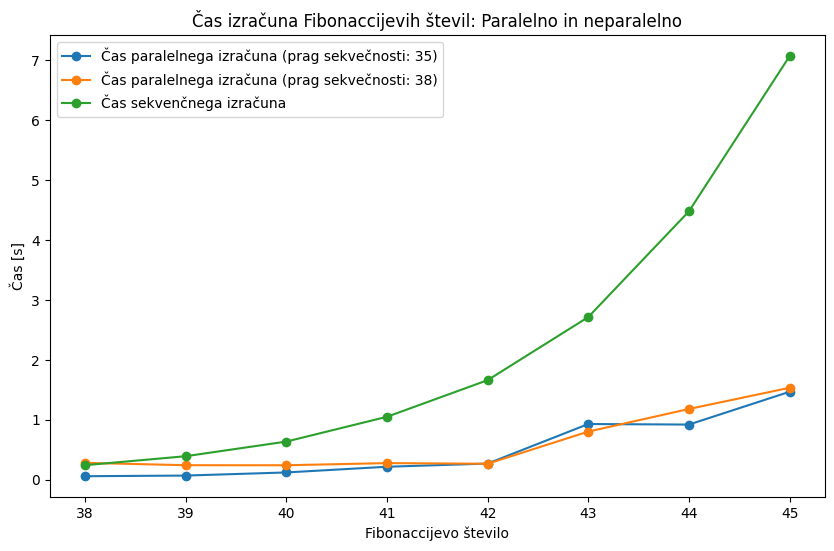

In [3]:
# Read the CSV file into a pandas df_bfs_combinationsFrame
data = pd.read_csv('fib_par_n.csv')

# Izlušči stolpce z podatki
fib_number = data['fib_number']
parallel_time_lower_threshold = data['parallel_time_lower_threshold']
parallel_time_upper_threshold = data['parallel_time_upper_threshold']
non_parallel_time = data['non_parallel_time']

# Prilagodi graf
plt.figure(figsize=(10, 6))
plt.plot(fib_number, parallel_time_lower_threshold, marker='o', label='Čas paralelnega izračuna (prag sekvečnosti: 35)')
plt.plot(fib_number, parallel_time_upper_threshold, marker='o', label='Čas paralelnega izračuna (prag sekvečnosti: 38)')
plt.plot(fib_number, non_parallel_time, marker='o', label='Čas sekvenčnega izračuna')
plt.xlabel('Fibonaccijevo število')
plt.ylabel('Čas [s]')
plt.title('Čas izračuna Fibonaccijevih števil: Paralelno in neparalelno')
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_n.jpg')

# Prikaz grafa
plt.show()



## BFS

### Analiza časa izvajanja BFS algoritma v odvisnosti od velikosti grafa

In [3]:
df_bfs_combinations = pd.read_csv('bfs_par_combinations.csv')

In [4]:
df_bfs_combinations.head()

,num_nodes,num_edges,parallel_time,sequential_time
0,134,67000,0.107,0.001
1,267,133500,0.178,0.006
2,401,200500,0.216,0.018
3,534,267000,0.253,0.038
4,668,334000,0.284,0.081


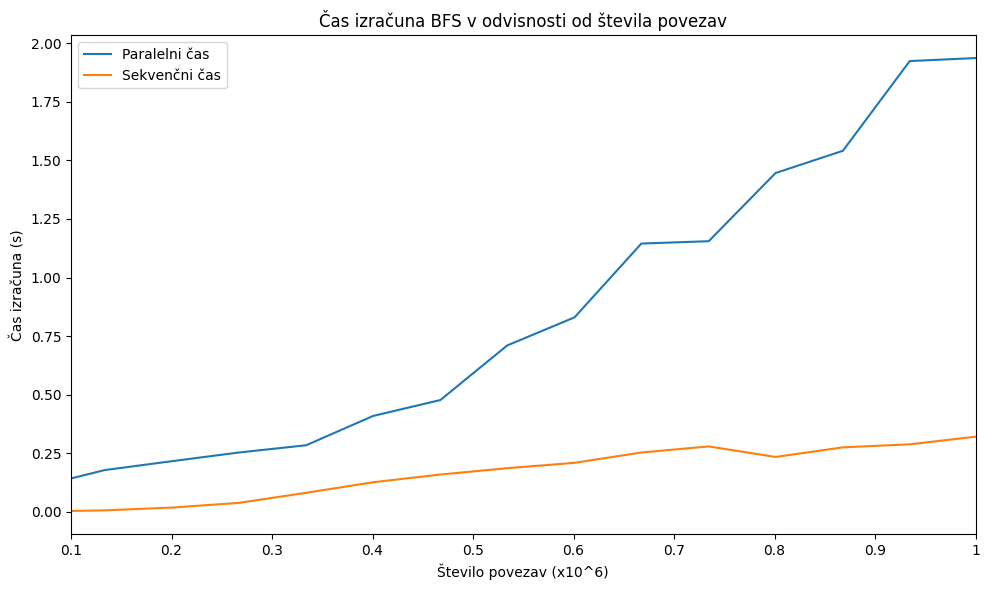

In [6]:
plt.figure(figsize=(10, 6))

# Plot the computation time as a function of num_edges
plt.plot(df_bfs_combinations['num_edges'], df_bfs_combinations['parallel_time'], label='Paralelni čas')
plt.plot(df_bfs_combinations['num_edges'], df_bfs_combinations['sequential_time'], label='Sekvenčni čas')
plt.xlabel('Število povezav (x10^6)')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna BFS v odvisnosti od števila povezav')

# Format x-axis
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
plt.gca().xaxis.set_major_formatter(ticks_x)

# Set x-axis limits and ticks
plt.xlim(100000, 1000000)
plt.xticks(range(100000, 1000001, 100000))

plt.legend()

# Display the plot with a bit of padding
plt.tight_layout()

plt.savefig('bfs_v_odvisnosti_od_velikosti_grafa.jpg')


plt.show()


### Analiza časa izvajanja algoritma BFS v odvisnosti od števila domen

In [7]:
df_bfs_par_domains = pd.read_csv('bfs_par_domains.csv')
df_bfs_par_domains

,num_domains,time
0,1,0.102
1,2,0.378
2,3,0.381
3,4,0.430
4,5,0.458
5,6,0.415
6,7,0.425
7,8,0.420


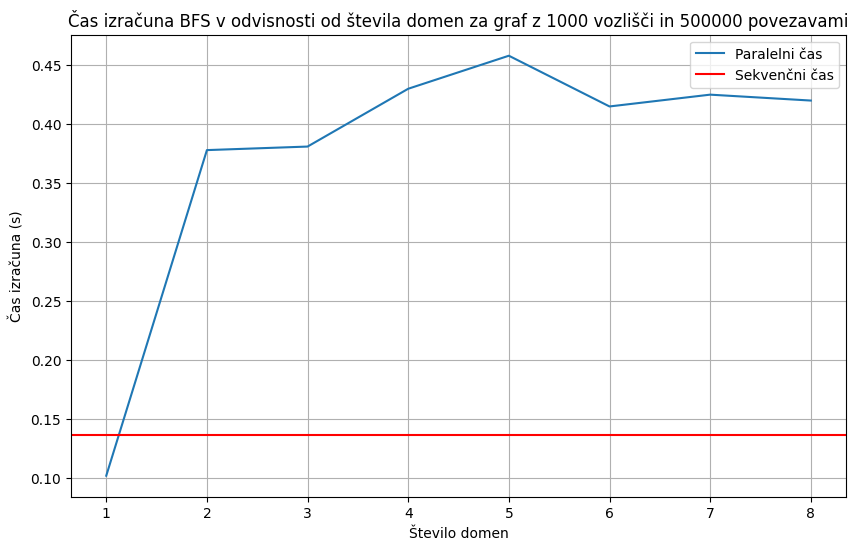

In [8]:
plt.figure(figsize=(10, 6))

# Plotting the computation time as a function of num_domains
plt.plot(df_bfs_par_domains['num_domains'], df_bfs_par_domains['time'], label='Paralelni čas')

# Adding a horizontal line for the sequential execution time
plt.axhline(y=0.136175, color='r', linestyle='-', label='Sekvenčni čas')

plt.xlabel('Število domen')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna BFS v odvisnosti od števila domen za graf z 1000 vozlišči in 500000 povezavami')

plt.legend()
plt.grid(True)

plt.savefig('bfs_v_odvisnosti_od_stevila_domen.jpg')

plt.show()
